### Logistic Regression

In [17]:
# Step 1: Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, RocCurveDisplay

# Load Data
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train data
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Evaluate Model
y_pred = log_reg.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("classification_report: ", classification_report(y_test, y_pred))


Accuracy:  0.956140350877193
classification_report:                precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


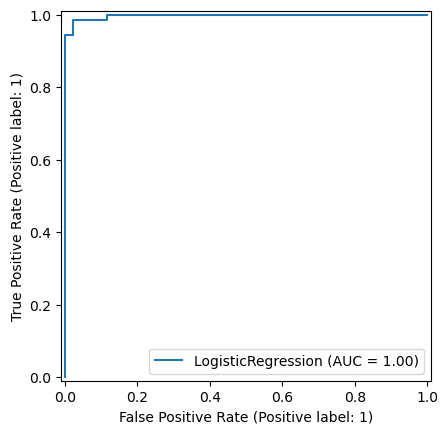

In [18]:
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)

In [4]:
# Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

# Best Evaluation Metrics
print("Best Parameters: ", grid.best_params_)
best_model = grid.best_estimator_
y_best_pred = best_model.predict(X_test)
print('Tuned Accuracy: ', accuracy_score(y_test, y_best_pred))
print(classification_report(y_test, y_best_pred))

Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Accuracy:  0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("classification_report: ", classification_report(y_test, y_pred))

Accuracy:  1.0
classification_report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [6]:
# Hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best params: ", grid.best_params_)
best_model = grid.best_estimator_
y_best_pred = best_model.predict(X_test)
print("Tuned Accuracy: ", accuracy_score(y_test, y_best_pred))
print(classification_report(y_test, y_best_pred))

Best params:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Tuned Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Decision Tree

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pre pruning
pre_pruned_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42)
pre_pruned_tree.fit(X_train, y_train)

# Evaluation
y_pred_pre = pre_pruned_tree.predict(X_test)
print('Pre-pruned Tree Accuracy', accuracy_score(y_test, y_pred_pre))
print(classification_report(y_test, y_pred_pre))

Pre-pruned Tree Accuracy 0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [8]:
# Post pruning
fulltree = DecisionTreeClassifier(random_state=42)
fulltree.fit(X_train, y_train)
path = fulltree.cost_complexity_pruning_path(X_train, y_train) # cost complexity pruning
ccp_alphas = path.ccp_alphas

trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

test_scores =  [accuracy_score(y_test, t.predict(X_test)) for t in trees]
best_tree = trees[test_scores.index(max(test_scores))]

print("PostPruned Tree Accuracy: ", max(test_scores))
print(classification_report(y_test, best_tree.predict(X_test)))




PostPruned Tree Accuracy:  0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



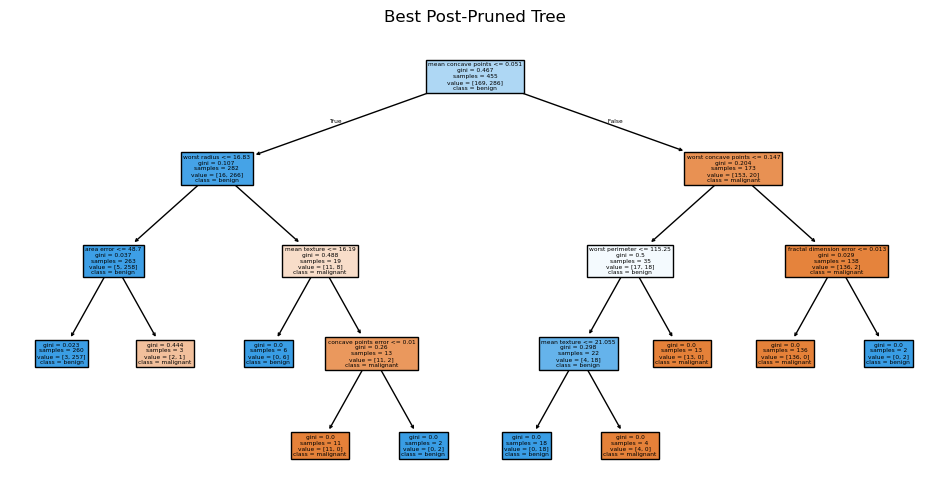

In [10]:
plt.figure(figsize=(12, 6))
plot_tree(best_tree, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Best Post-Pruned Tree")
plt.show()

### SVM

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X, y = data.data, data.target

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict(X_test)
print("Rbf accuracy", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Rbf accuracy 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [14]:

param_grid = {
    'C': [0.1, 1, 10], 
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_best = best_model.predict(X_test)
print("Tuned accuracy", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("best params: ", grid.best_params_)

Tuned accuracy 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

best params:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
